In [26]:
import numpy as np
import trimesh
from scipy.spatial import KDTree
import os

def load_model(file_path, file_type):
    """Load vertices from a 3D file using trimesh."""
    mesh = trimesh.load(file_path, file_type=file_type)
    return mesh.vertices
    
def calculate_distance_error(model_points, ground_truth_points):
    """Calculate the distance error between a model and ground truth."""
    if model_points.size == 0 or ground_truth_points.size == 0:
        print("One of the point arrays is empty, skipping calculation.")
        return float('nan'), float('nan'), float('nan')

    tree = KDTree(ground_truth_points)
    distances, _ = tree.query(model_points)
    return np.mean(distances), np.median(distances), np.max(distances)

def chamfer_distance(source, target):
    """Calculate the symmetric Chamfer distance."""
    if source.size == 0 or target.size == 0:
        print("One of the point arrays is empty, skipping calculation.")
        return float('nan'), np.array([]), np.array([])

    source_kd_tree = KDTree(source)
    target_kd_tree = KDTree(target)
    
    dist_source_to_target = target_kd_tree.query(source, k=1)[0]
    mean_dist_source_to_target = np.mean(dist_source_to_target)
    
    dist_target_to_source = source_kd_tree.query(target, k=1)[0]
    mean_dist_target_to_source = np.mean(dist_target_to_source)
    
    chamfer = mean_dist_source_to_target + mean_dist_target_to_source
    return chamfer, dist_source_to_target, dist_target_to_source

# Prepare directory for saving results
os.makedirs('Images', exist_ok=True)

In [27]:

model_key = 'Natural'

model_paths = {
    'Natural': {
        'lidar': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Nature/LiDARPLY/AdvancedExport/3DModel.ply',
        'gaussian': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Nature/3DGS.ply',
        'ground_truth': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Nature/LiDARPLY/3DModel.obj'
    # Add other models here...
    }
}

# Load points
paths = model_paths[model_key]
lidar_points = load_model(paths['lidar'],'ply')
gaussian_points = load_model(paths['gaussian'],'ply')
ground_truth_points = load_model(paths['ground_truth'], 'obj')

# Ensure the point clouds are correctly loaded
if lidar_points.size > 0 and gaussian_points.size > 0 and ground_truth_points.size > 0:
    gaussian_error = calculate_distance_error(gaussian_points, ground_truth_points)
    lidar_error = calculate_distance_error(lidar_points, ground_truth_points)

    chamfer, _, _ = chamfer_distance(lidar_points, gaussian_points)

    print(f"{model_key} - Gaussian Error: Avg={gaussian_error[0]:.4f}, Med={gaussian_error[1]:.4f}, Max={gaussian_error[2]:.4f}")
    print(f"{model_key} - LiDAR Error: Avg={lidar_error[0]:.4f}, Med={lidar_error[1]:.4f}, Max={lidar_error[2]:.4f}")
    print(f"{model_key} - Symmetric Chamfer Distance: {chamfer:.4f}")

    results = {'gaussian_error': gaussian_error, 'lidar_error': lidar_error, 'chamfer': chamfer}
else:
    print(f"Skipping {model_key} due to loading issues.")

Natural - Gaussian Error: Avg=5.4142, Med=1.2426, Max=50.5617
Natural - LiDAR Error: Avg=1.5330, Med=1.3662, Max=4.1950
Natural - Symmetric Chamfer Distance: 6.3498


In [30]:

model_key = 'Undetermined'

model_paths = {
    'Undetermined': {
        'lidar': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Undetermined/LiDARPLY/AdvancedExport/3DModel.ply',
        'gaussian': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Undetermined/3DGS.ply',
        'ground_truth': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Undetermined/LiDARPLY/3DModel.obj'
    # Add other models here...
    }
}

# Load points
paths = model_paths[model_key]
lidar_points = load_model(paths['lidar'],'ply')
gaussian_points = load_model(paths['gaussian'],'ply')
ground_truth_points = load_model(paths['ground_truth'], 'obj')

# Ensure the point clouds are correctly loaded
if lidar_points.size > 0 and gaussian_points.size > 0 and ground_truth_points.size > 0:
    gaussian_error = calculate_distance_error(gaussian_points, ground_truth_points)
    lidar_error = calculate_distance_error(lidar_points, ground_truth_points)

    chamfer, _, _ = chamfer_distance(lidar_points, gaussian_points)

    print(f"{model_key} - Gaussian Error: Avg={gaussian_error[0]:.4f}, Med={gaussian_error[1]:.4f}, Max={gaussian_error[2]:.4f}")
    print(f"{model_key} - LiDAR Error: Avg={lidar_error[0]:.4f}, Med={lidar_error[1]:.4f}, Max={lidar_error[2]:.4f}")
    print(f"{model_key} - Symmetric Chamfer Distance: {chamfer:.4f}")

    results = {'gaussian_error': gaussian_error, 'lidar_error': lidar_error, 'chamfer': chamfer}
else:
    print(f"Skipping {model_key} due to loading issues.")

Undetermined - Gaussian Error: Avg=4.6631, Med=0.4782, Max=48.7703
Undetermined - LiDAR Error: Avg=0.9115, Med=0.7738, Max=2.7246
Undetermined - Symmetric Chamfer Distance: 5.8349


In [ ]:
# Model results from each cell
model_results = {
    'Natural': {'gaussian_error': (x1, y1, z1), 'lidar_error': (a1, b1, c1), 'chamfer': d1},
    'Accidental': {'gaussian_error': (x2, y2, z2), 'lidar_error': (a2, b2, c2), 'chamfer': d2},
    'Homicidal': {'gaussian_error': (x3, y3, z3), 'lidar_error': (a3, b3, c3), 'chamfer': d3},
    'Suicidal': {'gaussian_error': (x4, y4, z4), 'lidar_error': (a4, b4, c4), 'chamfer': d4},
    'Undetermined': {'gaussian_error': (x5, y5, z5), 'lidar_error': (a5, b5, c5), 'chamfer': d5}
}
# Example results collection
#model_results = {
#    'Natural': results, 
    # Add results from other models...
#}

# Final visualization
model_names = list(model_results.keys())
x = np.arange(len(model_names))

gaussian_avg_errors = [model_results[m]['gaussian_error'][0] for m in model_names]
lidar_avg_errors = [model_results[m]['lidar_error'][0] for m in model_names]
chamfer_distances = [model_results[m]['chamfer'] for m in model_names]

# Visualize all results
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.3

ax.bar(x - width/3, gaussian_avg_errors, width=width/3, label='Gaussian Avg Error', color='skyblue')
ax.bar(x, lidar_avg_errors, width=width/3, label='LiDAR Avg Error', color='lightcoral')
ax.bar(x + width/3, chamfer_distances, width=width/3, label='Chamfer Distance', color='grey')

ax.set_xlabel('3D Models')
ax.set_ylabel('Error Distance / Chamfer Distance')
ax.set_title('Error Comparison: Gaussian Splatting vs LiDAR')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_yscale('log')  # Use logarithmic scale for better visibility
ax.legend()

plt.tight_layout()
fig.savefig('Images/all_models_comparison.png', dpi=200)
plt.show()


Natural - Gaussian Error: Avg=5.4142, Med=1.2426, Max=50.5617
Natural - LiDAR Error: Avg=1.5330, Med=1.3662, Max=4.1950
Natural - Symmetric Chamfer Distance: 6.3498

Accidental - Gaussian Error: Avg=4.9289, Med=0.7148, Max=49.1668
Accidental - LiDAR Error: Avg=0.5710, Med=0.4371, Max=2.7970
Accidental - Symmetric Chamfer Distance: 6.1981


Homicidal - Gaussian Error: Avg=5.3624, Med=0.5416, Max=48.9475
Homicidal - LiDAR Error: Avg=0.4174, Med=0.1665, Max=3.3499
Homicidal - Symmetric Chamfer Distance: 5.7511

Suicidal - Gaussian Error: Avg=4.0614, Med=0.8549, Max=50.0742
Suicidal - LiDAR Error: Avg=0.3280, Med=0.0706, Max=2.0957
Suicidal - Symmetric Chamfer Distance: 4.5498


Undetermined - Gaussian Error: Avg=4.6631, Med=0.4782, Max=48.7703
Undetermined - LiDAR Error: Avg=0.9115, Med=0.7738, Max=2.7246
Undetermined - Symmetric Chamfer Distance: 5.8349

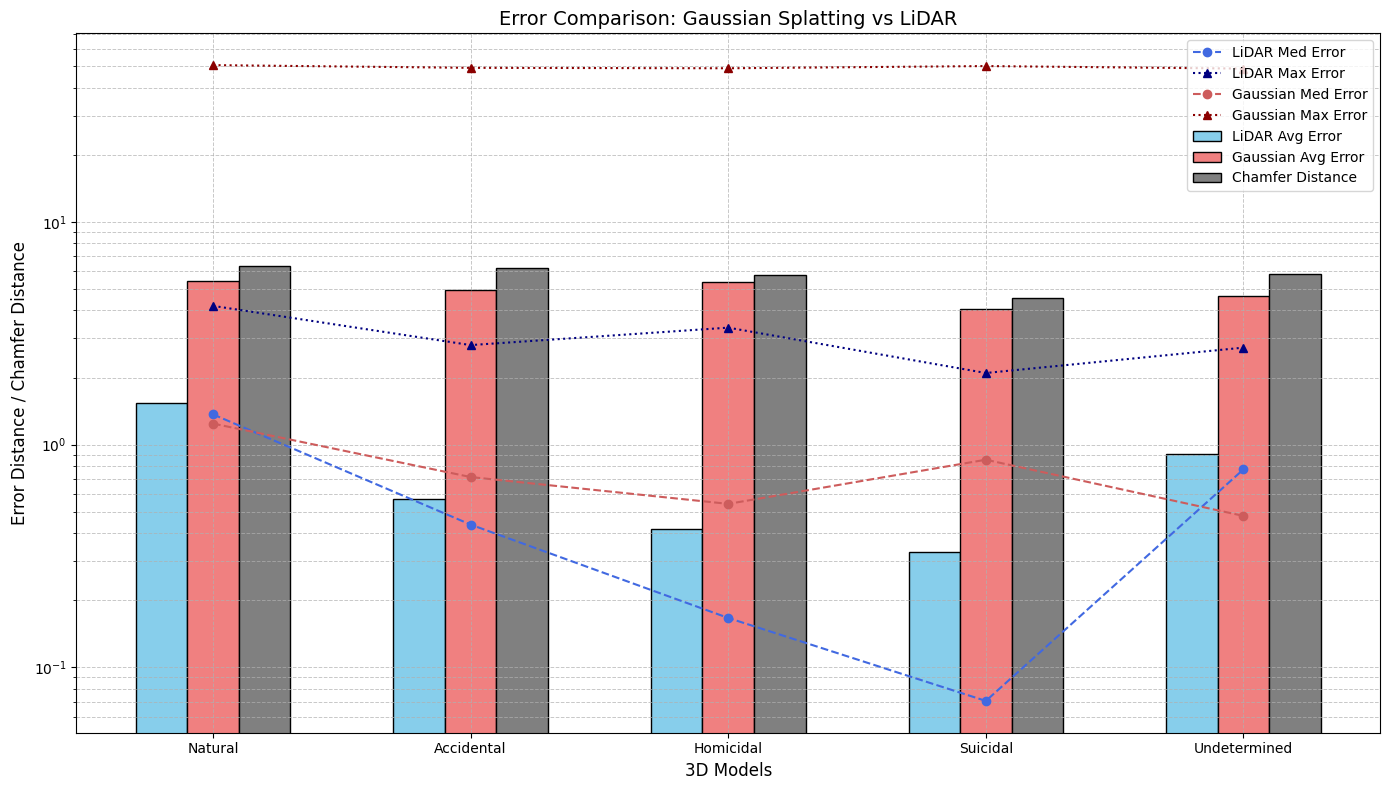

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Data
model_names = ['Natural', 'Accidental', 'Homicidal', 'Suicidal', 'Undetermined']
x = np.arange(len(model_names))

gaussian_avg_errors = [5.4142, 4.9289, 5.3624, 4.0614, 4.6631]
gaussian_med_errors = [1.2426, 0.7148, 0.5416, 0.8549, 0.4782]
gaussian_max_errors = [50.5617, 49.1668, 48.9475, 50.0742, 48.7703]

lidar_avg_errors = [1.5330, 0.5710, 0.4174, 0.3280, 0.9115]
lidar_med_errors = [1.3662, 0.4371, 0.1665, 0.0706, 0.7738]
lidar_max_errors = [4.1950, 2.7970, 3.3499, 2.0957, 2.7246]

chamfer_distances = [6.3498, 6.1981, 5.7511, 4.5498, 5.8349]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.2

# Bar plots with reversed colors
ax.bar(x - bar_width, lidar_avg_errors, width=bar_width, label='LiDAR Avg Error', color='skyblue', edgecolor='black')
ax.bar(x, gaussian_avg_errors, width=bar_width, label='Gaussian Avg Error', color='lightcoral', edgecolor='black')
ax.bar(x + bar_width, chamfer_distances, width=bar_width, label='Chamfer Distance', color='grey', edgecolor='black')

# Line plots for median and max errors with reversed colors
ax.plot(x, lidar_med_errors, marker='o', linestyle='--', color='royalblue', label='LiDAR Med Error')
ax.plot(x, lidar_max_errors, marker='^', linestyle=':', color='navy', label='LiDAR Max Error')
ax.plot(x, gaussian_med_errors, marker='o', linestyle='--', color='indianred', label='Gaussian Med Error')
ax.plot(x, gaussian_max_errors, marker='^', linestyle=':', color='darkred', label='Gaussian Max Error')

# Customize the plot
ax.set_xlabel('3D Models', fontsize=12)
ax.set_ylabel('Error Distance / Chamfer Distance', fontsize=12)
ax.set_title('Error Comparison: Gaussian Splatting vs LiDAR', fontsize=14)
ax.set_yscale('log')  # Use logarithmic scale for better visibility
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=10)
ax.legend(fontsize=10)
ax.grid(True, which='both', linestyle='--', alpha=0.7, linewidth=0.7)

plt.tight_layout()

# Save the figure
fig.savefig('Images/A1.png', dpi=200)

plt.show()